This notebook demos a few hypothesis tests that you can do with the scipy library.

Let's start by importing libraries

In [22]:
import pandas as pd
from scipy import stats

## Load data

In [11]:
data = pd.read_csv('data/brain_size.csv', sep=';', na_values=".")

In [12]:
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


In [13]:
data.shape

(40, 7)

### Basic stats: Finding Mean

What's the mean VIQ for females?

In [14]:
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

What's the mean IQ, weight, height,... for males and females?

Split the dataframe on values of categorical variables

In [15]:
data.groupby('Gender').mean()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,
Female,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,115.0,115.25,111.60,166.444444,71.431579,954855.4


### Visualize

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

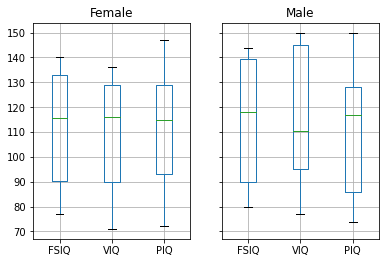

In [17]:
groupby_gender = data.groupby('Gender')
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])

## Hypothesis testing

We have seen above that the mean VIQ in the male and female populations were different.
But is this difference statistically significant?

### t-test

To test if this is significant, we do a 2-sample t-test with [scipy.stats.ttest_ind()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)

In [23]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

**<span class="mark">TODO</span>**: What can you conclude?

### paired tests
repeated measures on the same individuals

PIQ, VIQ, and FSIQ give 3 measures of IQ for each person. 
Are FISQ and PIQ are significantly different? How do we test that?

**<span class="mark">TODO</span>**: What can you conclude?

Check what happens with two sampled t-test and paired two sample (you can use [stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html))

#### Visualize first

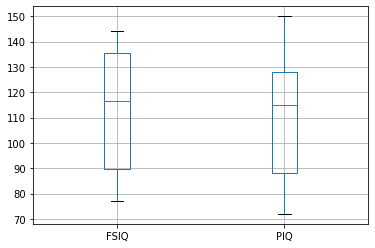

In [40]:
data.boxplot(column=['FSIQ', 'PIQ'])

In [24]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [25]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])   

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

The variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or ["repeated measures test"](https://en.wikipedia.org/wiki/Repeated_measures_design)

### Wilcoxon signed-rank test
T-tests assume Gaussian errors. We can use a [Wilcoxon signed-rank](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) test, that relaxes this assumption

In [26]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])  

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

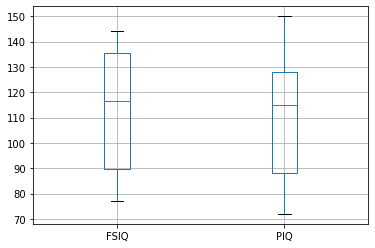

In [39]:
data.boxplot(column=['FSIQ', 'PIQ'])

In [37]:
FSIQ = data.groupby('FSIQ')
PIQ = data.groupby('PIQ')

KeyError: "['VIQ'] not in index"

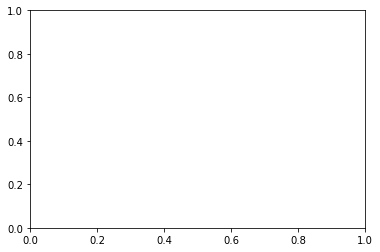

In [31]:
df.boxplot(column=['FSIQ', 'VIQ'])

In [41]:
import json #library for dealing with json data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
decoder = json.JSONDecoder()

[JSON](https://en.wikipedia.org/wiki/JSON) is a file format for storing attribute-value pairs. Let's start by looking at one line.

In [50]:
filename = 'data/ebola-tweets-short.json'

In [51]:
with open(filename) as fin:
    line = fin.readline()
    print (line)
    tweet = decoder.decode(line)

{"created_at":"Thu Aug 28 15:34:30 +0000 2014","id":505015575811457024,"id_str":"505015575811457024","text":"Rebola, gatinha http:\/\/t.co\/xMxqJE5o3U","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":360002438,"id_str":"360002438","name":"jubas\u2661","screen_name":"luhantella","location":"\u266111.05.14.\u2661","url":"http:\/\/ask.fm\/httpshawol","description":"\u300c2ne1dsoshineexo\u300d are my drugs. + girl's day vixx bigbang orange caramel got7 suju bestie akmu. \u2665\ufe0e2Crazy \u2661 rua das HunHan \u00acu\u00ac\u2661 For eternity, Elli. \u2764\ufe0f Gabi \u2764\ufe0f","protected":false,"verified":false,"followers_count":802,"friends_count":1303,"listed_count":2,"favourites_count":1492,"statuses_count":44745,"created_at":"Mon

The JSON object itself is a dict of key-value pairs.

In [52]:
print(tweet.keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweet_count', 'favorite_count', 'entities', 'extended_entities', 'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms'])


user is a nested JSON object, which is itself a list of key-value pairs.

In [47]:
tweet['user']

{'id': 360002438,
 'id_str': '360002438',
 'name': 'jubas♡',
 'screen_name': 'luhantella',
 'location': '♡11.05.14.♡',
 'url': 'http://ask.fm/httpshawol',
 'description': "「2ne1dsoshineexo」 are my drugs. + girl's day vixx bigbang orange caramel got7 suju bestie akmu. ♥︎2Crazy ♡ rua das HunHan ¬u¬♡ For eternity, Elli. ❤️ Gabi ❤️",
 'protected': False,
 'verified': False,
 'followers_count': 802,
 'friends_count': 1303,
 'listed_count': 2,
 'favourites_count': 1492,
 'statuses_count': 44745,
 'created_at': 'Mon Aug 22 14:46:00 +0000 2011',
 'utc_offset': -14400,
 'time_zone': 'Santiago',
 'geo_enabled': False,
 'lang': 'pt',
 'contributors_enabled': False,
 'is_translator': False,
 'profile_background_color': 'FFFFFF',
 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/472048019739648000/FuWpbKrv.jpeg',
 'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/472048019739648000/FuWpbKrv.jpeg',
 'profile_background_tile': False,

In [53]:
# gather all tweet user variables
with open(filename) as fin:
    tweet_users = [decoder.decode(line)['user'] for line in fin.readlines()]

## Hypothesis test

English is the most popular language on Twitter, so perhaps it offers more followers.

Let's do a hypothesis test comparing the number of followers for English-speaking accounts to the number of followers for all other accounts. Specifically, we'll test the hypothesis:

- Ha: The median English-speaking twitter user has more followers than the median non-English-speaking twitter user

### First let's put our data in a dataframe

In [54]:
# here's a dataframe that includes whether the user's language is English
df = pd.DataFrame({'id':np.array([user['id'] for user in tweet_users]),
                   'followers':np.array([user['followers_count'] for user in tweet_users]),
                   'friends':np.array([user['friends_count'] for user in tweet_users]),
                   'statuses':np.array([user['statuses_count'] for user in tweet_users]),
                   'lang_en':[user['lang']=='en' for user in tweet_users]})

In [61]:
df.head(3) #inspect

,id,followers,friends,statuses,lang_en
0,360002438,802,1303,44745,False
1,57416517,587,953,44148,True
2,1373051762,251,244,8420,True


Are there any duplicate users in the list?

We can tell by looking at the id.

In [56]:
print(len(df['id'].unique()),len(df))

861 1000


There are only 861 unique user IDs among these 1000 tweets.

#### removing duplicates

Let's aggregate by taking the max number of followers and friends for each ID

In [58]:
df_agg = df.groupby('id').aggregate('max')

In [59]:
df.head(3)

,id,followers,friends,statuses,lang_en
0,360002438,802,1303,44745,False
1,57416517,587,953,44148,True
2,1373051762,251,244,8420,True


In [63]:
# print the median
print(df_agg.loc[df_agg['lang_en']].median()) #english
print(df_agg.loc[~df_agg['lang_en']].median()) #non-english

followers     417.0
friends       344.0
statuses     8420.0
lang_en         1.0
dtype: float64
followers     399.0
friends       380.0
statuses     9931.5
lang_en         0.0
dtype: float64


The medians are very close, but the English speakers do have a higher median number of followers?

Let's perform a hypothesis test to answer this question.

[Wilcoxon test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)

The two-sided test has the null hypothesis that the median of the differences is zero against the alternative that it is different from zero. The one-sided test has the null hypothesis that the median is positive against the alternative

In [70]:
eng = df_agg.loc[df_agg['lang_en']].median()
noneng = df_agg.loc[~df_agg['lang_en']].median()
stats.wilcoxon(eng,noneng, alternative='two-sided')

WilcoxonResult(statistic=3.0, pvalue=0.625)

**<span class="mark">TODO</span>** What can you conclude?

### Other Resources

* [Hypothesis Testing in Python](https://pygot.wordpress.com/2018/06/28/hypothesis-testing-in-python/)

Nonparametric statistics are those methods that do not assume a specific distribution to the data. They refer to statistical methods that do not assume a Gaussian distribution. 
* [Non-Parametric Tests in Hypothesis Testing](https://towardsdatascience.com/non-parametric-tests-in-hypothesis-testing-138d585c3548)
* [Nonparametric Statistical Significance Tests in Python]( https://jmyao17.github.io/Statistics/Nonparametric_Statistical_Significance_Tests.html)